In [532]:
import pandas as pd
import numpy as np
import os

his_path = 'sim/2030/logs/his'
data_files = [f for f in os.listdir(his_path) if os.path.isfile(os.path.join(his_path, f))]
data_files = [f for f in data_files if '.bak' not in f]
data_files

['host_0_tracker_0.csv', 'host_0_tracker_1.csv']

In [533]:
RES_CONSUMP = 0.00131 # MW

In [534]:
df = pd.DataFrame()
for f in data_files:
    df = pd.concat([df, pd.read_csv(os.path.join(his_path, f))])
print("results from: {} generators".format(len(df.id.unique())))
df

results from: 24 generators


,id,ts,host,tracker,output,demand,net_cap,percent_use
0,-1654770793,1,0,0,47.494124,42.00,5.494124,0.115680
1,-528546951,1,0,0,22.544192,42.75,-20.205808,-0.896276
2,-1293263167,1,0,0,150.143536,105.00,45.143536,0.300669
3,-182766963,1,0,0,88.200000,73.50,14.700000,0.166667
4,-195991192,1,0,0,113.060660,105.00,8.060660,0.071295
...,...,...,...,...,...,...,...,...
552,991293890,47,0,1,88.200000,73.50,14.700000,0.166667
553,1943371260,47,0,1,88.200000,73.50,14.700000,0.166667
554,57732558,47,0,1,50.003442,42.00,8.003442,0.160058
555,1811534858,47,0,1,88.200000,73.50,14.700000,0.166667


In [535]:
df.ts.unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47])

Find instances where capacity was negative

In [536]:
df.groupby(['ts','tracker']).first().head()

id  host      output  demand    net_cap  percent_use
ts tracker                                                              
1  0       -1654770793     0   47.494124   42.00   5.494124     0.115680
   1        1447796223     0  116.962916  105.00  11.962916     0.102280
2  0        -528546951     0   35.927533   42.75  -6.822467    -0.189895
   1        1447796223     0  127.118624  105.00  22.118624     0.174000
3  0        -528546951     0   37.603879   42.75  -5.146121    -0.136851

In [537]:
t = df[(df.ts == 3) & (df.tracker == 1)]
t

,id,ts,host,tracker,output,demand,net_cap,percent_use
24,1447796223,3,0,1,128.366184,105.00,23.366184,0.182028
25,1367406317,3,0,1,877.500000,731.25,146.250000,0.166667
26,1943371260,3,0,1,88.200000,73.50,14.700000,0.166667
27,1863679415,3,0,1,121.933028,105.00,16.933028,0.138872
28,844283200,3,0,1,130.714089,105.00,25.714089,0.196720
29,743607863,3,0,1,88.200000,73.50,14.700000,0.166667
30,991293890,3,0,1,88.200000,73.50,14.700000,0.166667
31,1043607079,3,0,1,128.801244,105.00,23.801244,0.184790
32,1811534858,3,0,1,88.200000,73.50,14.700000,0.166667
33,57732558,3,0,1,37.124992,42.00,-4.875008,-0.131313


In [538]:
t = df[df.ts == 3].groupby(['tracker']).get_group(1).set_index('id')
t.T

id,1447796223,1367406317,1943371260,1863679415,844283200,743607863,991293890,1043607079,1811534858,57732558,1283859926,1220602957
ts,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000
host,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
tracker,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
output,128.366184,877.500000,88.200000,121.933028,130.714089,88.200000,88.200000,128.801244,88.200000,37.124992,135.516896,39.813271
demand,105.000000,731.250000,73.500000,105.000000,105.000000,73.500000,73.500000,105.000000,73.500000,42.000000,105.000000,42.750000
net_cap,23.366184,146.250000,14.700000,16.933028,25.714089,14.700000,14.700000,23.801244,14.700000,-4.875008,30.516896,-2.936729
percent_use,0.182028,0.166667,0.166667,0.138872,0.196720,0.166667,0.166667,0.184790,0.166667,-0.131313,0.225189,-0.073763


find time stamps where net_cap was negative.

In [539]:
deficit = t[t.percent_use < 0.15]
surplus = t[t.percent_use > 0]

load_to_shift = deficit.net_cap.sum()
print('need to shift {:.1f} MW'.format(load_to_shift))
print('{:,} homes'.format(np.ceil(load_to_shift / RES_CONSUMP).astype(int)))

available_capacity = surplus.net_cap.sum()
print('able to shift {:.1f} MW'.format(available_capacity))

need to shift 9.1 MW
6,963 homes
able to shift 325.4 MW


In [540]:
ts = 5
net_system_cap = supply.net_cap.sum() - deficit.net_cap.sum()
print("at ts {} available capacity was {:.3f} MW".format(str(ts).rjust(3,"0"), net_system_cap))

at ts 005 available capacity was 266.495 MW


Running the below code reveals that each tracker always contains spare capacity

# Changed net_cap_percentto percent_use

In [553]:
df.columns = ['id', 'ts', 'host', 'tracker', 'output', 'demand', 'net_cap', 'percent_use']
df.index.name = 'e_id'
df.output = np.round(df.output, 3)
safety_threshold = 0.1
for tracker in range(df.tracker.max() + 1):
    print("Tracker {}".format(tracker))
    print("===========")
    for ts in range(df.ts.max())[-3:]:
        _ = df[(df.ts == ts) & (df.tracker == tracker)].copy()
        _['s_demand'] = np.round((_.output * (1 - safety_threshold)),2)
        _['s_net_cap'] =  _['s_demand'] - _['demand']
        deficit = _[_['percent_use'] < safety_threshold].copy()
        surplus = _[_['percent_use'] > safety_threshold].copy()
        net_system_cap = supply.net_cap.sum() - deficit.net_cap.sum()
        total_available_capacity = (surplus.output * (1 - safety_threshold) - surplus.demand).sum()

        print("at ts = {}".format(str(ts).rjust(2,"0")))
#         print(_[['output','demand','s_demand','net_cap','s_net_cap','percent_use']])
        print("------------------------------------")
        print("   - total capacity was  {:.2f} MW".format(_.output.sum()))
        print("   - total demand was    {:.2f} MW".format(_.demand.sum()))  
        print("                         ---------")
        print("   - spare capacity was  {:.2f} MW    // ignoring safety factor".format(net_system_cap))
        print("------------------------------------")
        print('   - able to shift       {} MW    // considering safety factor'.format('{:.1f}'.format(total_available_capacity).rjust(6)))
        print("------------------------------------")
        safe_load   = (_.output * (1 - safety_threshold)).sum()
        unsafe_load = (deficit.output * (1 - safety_threshold) - deficit.demand).sum()
        load_to_shift = safe_load - deficit.demand.sum()
        print("   - 'Safe Load' was     {:.2f} MW    // considering safety factor".format(safe_load))

        if unsafe_load < 0:
        # else deficit.output - deficit.demand = (-) load must be shifted
            print("   - 'Unsafe Load' was   {} MW    // need to shift".format('({:.1f})'.format(abs(unsafe_load)).rjust(6, " ")))
            homes_to_shift = np.ceil(np.abs(unsafe_load) / RES_CONSUMP).astype(int)
            surplus['s_net_cap'] = (surplus.output * (1 - safety_threshold)) - surplus.demand
            deficit['s_net_cap'] = (deficit.output * (1 - safety_threshold)) - deficit.demand
            surplus['share_of_net'] =  surplus['s_net_cap'] / surplus['s_net_cap'].sum()
            deficit['share_of_net'] =  deficit['s_net_cap'] / deficit['s_net_cap'].sum()
            surplus['new_load'] = -1 * np.round((surplus['share_of_net'] * unsafe_load) / RES_CONSUMP) * RES_CONSUMP
            deficit['new_load'] = -1 * surplus['new_load'].sum() * deficit['share_of_net']
            s = surplus['percent_use'].sort_values(ascending=True)

            print('   - Load shifting to   {} homes // {:,.1f} MW shifted'.format('{:,}'.format(homes_to_shift).rjust(7),
                                                                                  abs(surplus.new_load.sum()),abs(surplus.new_load.sum())))
            # 38 char
#             print('{}// {:,.1f} MW shifted'.format("".rjust(38), ))
            print("------------------------------------")
            print("All Data")
            print(pd.concat([surplus,deficit])[['output','demand','net_cap','s_net_cap','share_of_net','new_load']])
        else:
            # if   deficit.output - deficit.demand = (+) then no load need be shifted
            print("   - 'Unsafe Load' was        0 MW    ".format(load_to_shift)) # // {:.2f}
            print("------------------------------------")
            print("NO LOAD TO SHIFT".center(36))
        print("=" * 36)

Tracker 0
at ts = 40
------------------------------------
   - total capacity was  988.83 MW
   - total demand was    851.25 MW
                         ---------
   - spare capacity was  275.20 MW    // ignoring safety factor
------------------------------------
   - able to shift         55.2 MW    // considering safety factor
------------------------------------
   - 'Safe Load' was     889.95 MW    // considering safety factor
   - 'Unsafe Load' was   (16.5) MW    // need to shift
   - Load shifting to    12,597 homes // 16.5 MW shifted
------------------------------------
All Data
       output  demand    net_cap  s_net_cap  share_of_net  new_load
e_id                                                               
468   124.865  105.00  19.864784     7.3785      0.133666  2.206040
472   128.868  105.00  23.868333    10.9812      0.198930  3.282860
473    88.200   73.50  14.700000     5.8800      0.106519  1.758020
474   124.935  105.00  19.935226     7.4415      0.134807  2.224380

In [554]:
df.groupby('ts').size()

ts
1     24
2     24
3     24
4     24
5     24
6     24
7     24
8     24
9     24
10    24
11    24
12    24
13    24
14    24
15    24
16    24
17    24
18    24
19    24
20    24
21    24
22    24
23    24
24    24
25    24
26    24
27    24
28    24
29    24
30    24
31    24
32    24
33    24
34    24
35    24
36    24
37    24
38    24
39    24
40    24
41    24
42    24
43    24
dtype: int64

In [551]:
df.ts.unique().size

43

In [555]:
df = df[df.ts < df.ts.unique().size - 1]

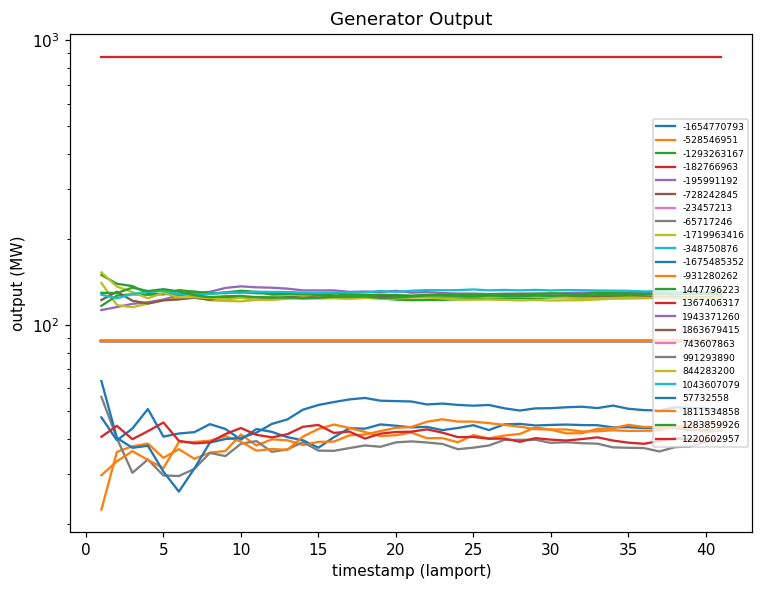

In [556]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(8,6), dpi=110)

index = df.ts.unique()

for gen_id in df.id.unique():
    plt.plot(index.astype(int), df[df['id'] == gen_id].output)
    
ax.legend(df.id.unique(), fontsize=6, loc='center right', bbox_to_anchor=(1.0, 0.5))
plt.yscale('log') # or "log"
ax.set_title('Generator Output')
ax.set_xlabel("timestamp (lamport)")
ax.set_ylabel("output (MW)")
    
plt.show()